# Imports 

In [ ]:
#%pip install ipympl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import glob
import h5py
from matplotlib import rc
rc("animation", html = "html5")

In [ ]:
class Bubble(object):
    """
    Bubble contains all the functions for animating n-body and hydrodynamical simulations.
    
    Args: path (string): File path to a folder of data to animate (files should be hdf5)
          key (string): Data source to be plotted (header of hdf5 file) 
          ind (array): 2D array/list/tuple containing which indices the GALINDA will plot over 

    Attrs: fnames (array): A numpy array of filenames to animate
           key (string): Data source to be plotted (header of hdf5 file) 
           ind (array): 2D array/list/tuple containing which indices the GALINDA will plot over
    """

    def __init__(self,path,key,ind = [0,1]):
        self.path = path
        if "*" not in self.path:
            self.path += "*"
            
        self.fnames = glob.glob(path + "*")
        self.key = key
        self.ind = ind 

        
    def histogram(self):
        """
        Creates attributes for 2D histograms
        
        Attrs: to_plot (array): Array of values to plot
               binX (array): Histogram's x-values for bins
               binY (array): Histogram's y-values for bins
            
        """
        self.to_plot,self.binX,self.binY = np.histogram2d(self.x,self.y, bins = self.bins)
        
        
    def plot(self,i,return_image = False):
        """
        Function that plots a 2D histogram of data values
        
        Args: i (int): The index for which timestep to plot
        
        Attrs: f (h5py directory): An h5py directory of all the data in the i-th timestep
               data (array): Data to be plotted
               x (array): The x values of the simulation
               y (array): The y values of the simulation
               bins (array): The number of bins to put the data into (for a size N array, we have round(sqrt(N))/2)
               
        """
        self.f = h5py.File(self.fnames[i])
        self.data = np.array(self.f[self.key])
        self.x,self.y = self.data[:,self.ind[0]], self.data[:,self.ind[1]]
        self.bins = int(np.sqrt(len(self.x))/2)
        self.histogram()
        
        if not hasattr(self, "fig"):
            self.fig, self.ax = plt.subplots()
        
        if not hasattr(self, "im"):
            self.im = plt.imshow(self.to_plot)
        else:
            self.im.set_data(self.to_plot)
            
    def animate(self,figsize = (8,8)):
        """
        Animation!
        
        Args: figsize (tuple): How big to make the images
        
        Attrs: fig (Figure): The figure to animate on
               ax (Axes): The axes to animate on
               ani (Animation): The animation itself
        """
        self.fig, self.ax = plt.subplots(figsize = figsize)
        self.ani = animation.FuncAnimation(self.fig, self.plot, np.arange(len(self.fnames)))
        
    def collage(self, i_start, nrows = 1, ncols = 1):
        """
        A collage of images from
        
        Args: i_start (int): The index to start the collage with
              nrows (int): How many rows to make the collage
              ncols (int): How many columns to make the collage

        Attrs: colfig (Figure): The collage Figure
               colax (np.array(Axes)): An array of Axes objects
        """
        
    def save_ani(self,save_file, fps = 5):
        """
        Save an animation
        
        Args: save_file (string): The name that the user would like to save the animation
              fps (int): Number of frames per second for the animation
        
        """
        if not hasattr(self, "ani"):
            self.animate()
            
        FFwriter = animation.FFMpegWriter(fps=fps)
        self.ani.save(save_file, writer = self.FFwriter)
        

# GALINDA tests

In [88]:
gal = GALINDA("animation_data/", "m11h_star_coordinates")

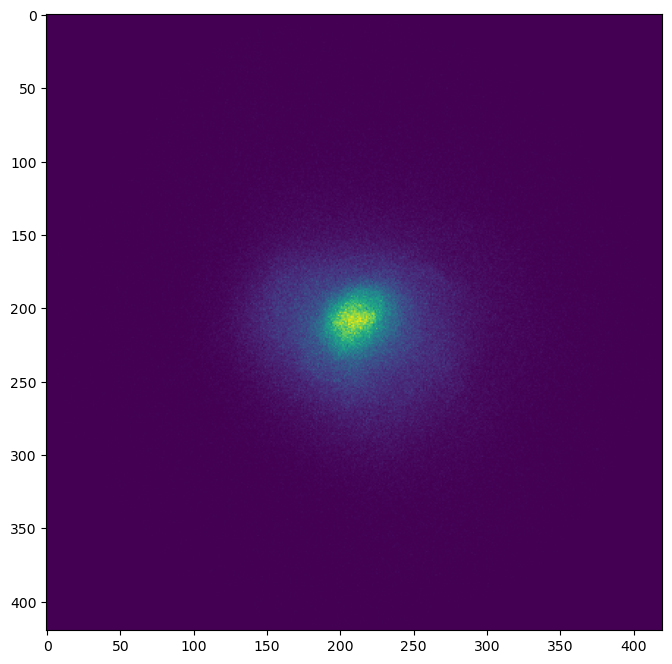

In [51]:
gal.animate()

In [32]:
gal.ani

In [ ]:
fig, ax = gal.plot(1,return_image = True)

In [86]:
gal.fig.show()

/tmp/ipykernel_15578/505256398.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  gal.fig.show()


In [56]:
for i in range(len(gal.fnames)):
    gal.plot(i,show = True)

/tmp/ipykernel_15578/161852198.py:64: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


# Random Tests

In [8]:
glob.glob("animation_data/*.hdf5")
"*" in "animation_data/*.hdf5"

True

In [10]:
f = h5py.File("animation_data/star_coord_581.hdf5", "r")

In [17]:
np.array(f["m11h_star_coordinates"])[:,0]

array([1.25135101, 1.26004507, 1.23061369, ..., 4.40513692, 4.44712767,
       4.46653473], shape=(706582,))

# Testing Animation

## Below is code to run animation in notebook

Possibly need to `conda install ffmpeg` in terminal

In [4]:
from matplotlib import rc
rc("animation", html = "html5")
#gal.ani